In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 설정
import platform
plt.rc('font', family='Malgun Gothic')
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False) 
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

""" # Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning)  
pd.set_option('mode.chained_assignment',  None)   
#pd.set_option('mode.chained_assignment', 'warn') """

" # Warning 제거\nimport warnings\nwarnings.simplefilter(action='ignore', category=FutureWarning) \nwarnings.simplefilter(action='ignore', category=UserWarning)  \npd.set_option('mode.chained_assignment',  None)   \n#pd.set_option('mode.chained_assignment', 'warn') "

# dataset

In [2]:
train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')
aaa = pd.read_csv(r'data\gender_submission.csv')

# pre-processing

In [3]:
test = pd.merge(test,aaa,on='PassengerId')

test_columns = list(test.columns) 
test_columns.remove('Survived')
test_columns.insert(1,'Survived')
test = test[test_columns]

In [4]:
train.drop(labels=['PassengerId','Name','Ticket', 'Fare', 'Cabin'],axis=1,inplace=True)

In [5]:
test.drop(labels=['PassengerId','Name','Ticket', 'Fare', 'Cabin'],axis=1,inplace=True)

In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [7]:
test.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [8]:
train.dropna(subset=['Age','Embarked'],inplace=True)
test.dropna(subset=['Age'],inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='c'>

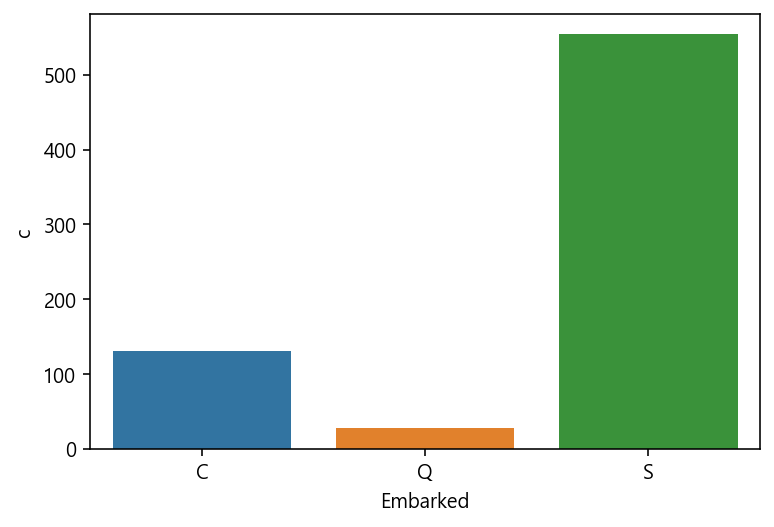

In [9]:
sns.barplot(data=train.groupby('Embarked',as_index=False).agg(c=('Age','count')), x='Embarked',y='c')
# C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
train['sexint'] = train['Sex'].apply(lambda x : 1 if x=='male' else 0)
train.drop(labels=['Sex'],axis=1,inplace=True)
train = train.rename(columns={'sexint':'Sex'})

train['Embarkedint'] = train['Embarked'].apply(lambda x : 1 if x=='S' else 2 if x=='C' else 3)
train.drop(labels=['Embarked'],axis=1,inplace=True)
train = train.rename(columns={'Embarkedint':'Embarked'})

<AxesSubplot:xlabel='Embarked', ylabel='c'>

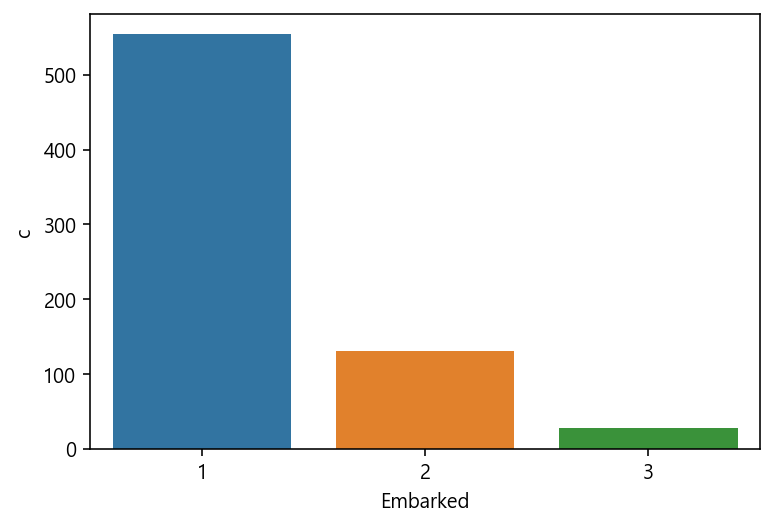

In [11]:
sns.barplot(data=train.groupby('Embarked',as_index=False).agg(c=('Age','count')), x='Embarked',y='c')
# 2 = Cherbourg, 3 = Queenstown, 1 = Southampton

In [12]:
test['sexint'] = test['Sex'].apply(lambda x : 1 if x=='male' else 0)
test.drop(labels=['Sex'],axis=1,inplace=True)
test = test.rename(columns={'sexint':'Sex'})

test['Embarkedint'] = test['Embarked'].apply(lambda x : 1 if x=='S' else 2 if x=='C' else 3)
test.drop(labels=['Embarked'],axis=1,inplace=True)
test = test.rename(columns={'Embarkedint':'Embarked'})

In [13]:
train['age_group'] = train['Age'].apply(lambda x : (x//10)*10)
test['age_group'] = test['Age'].apply(lambda x : (x//10)*10)

In [14]:
train = train.astype('int64')
test = test.astype('int64')

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   332 non-null    int64
 1   Pclass     332 non-null    int64
 2   Age        332 non-null    int64
 3   SibSp      332 non-null    int64
 4   Parch      332 non-null    int64
 5   Sex        332 non-null    int64
 6   Embarked   332 non-null    int64
 7   age_group  332 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


# visualization

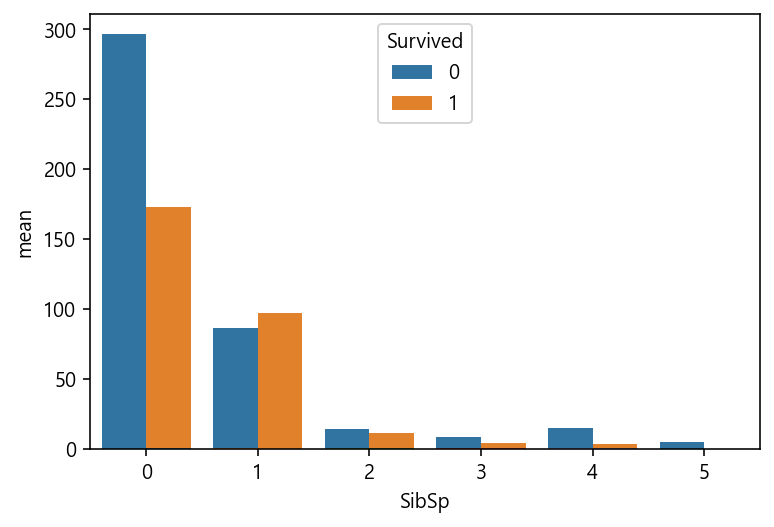

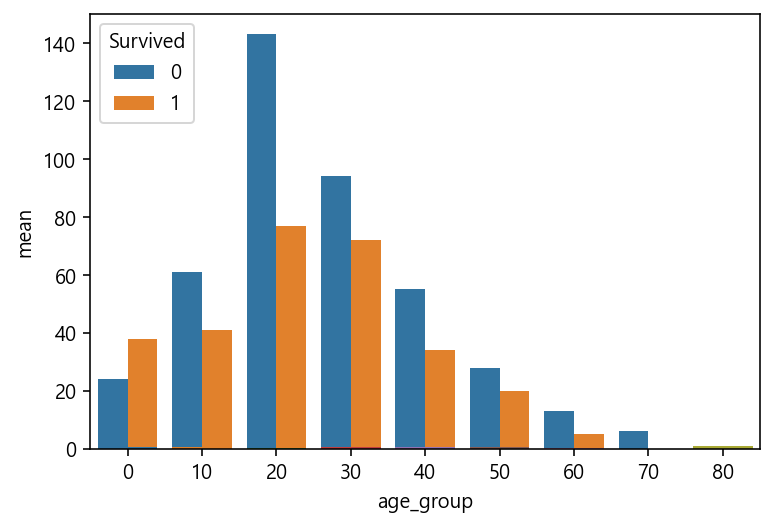

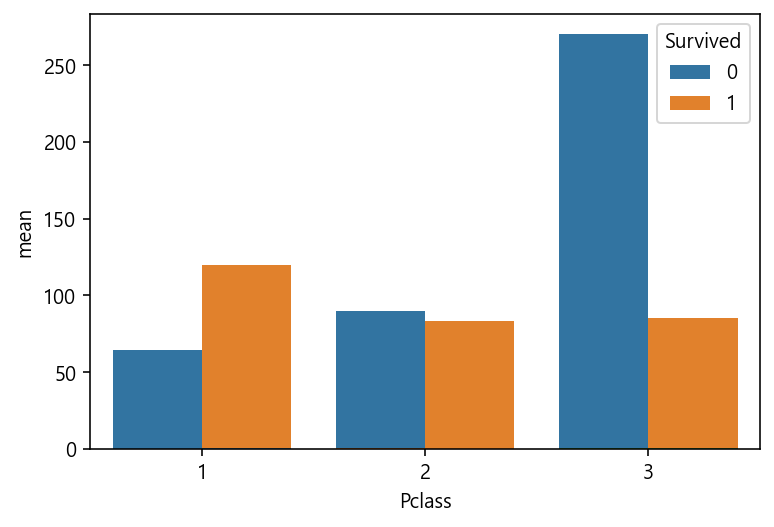

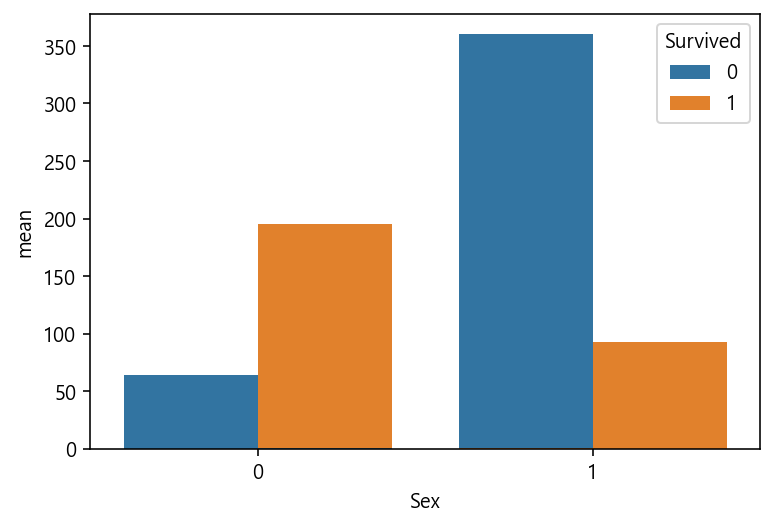

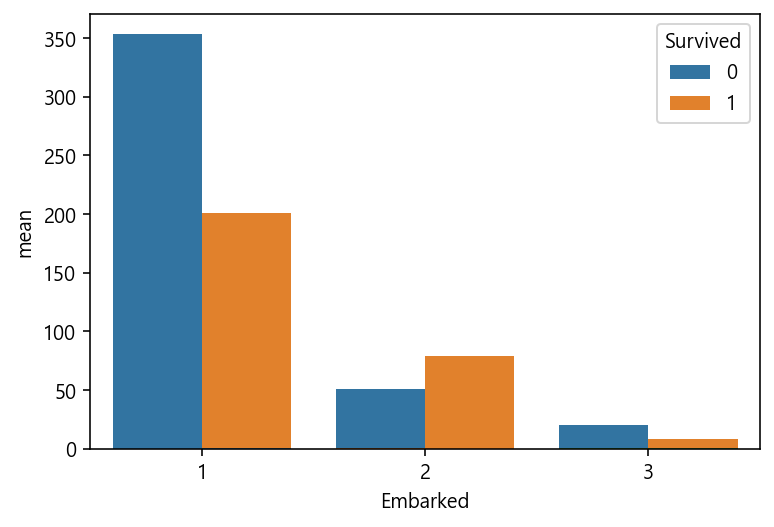

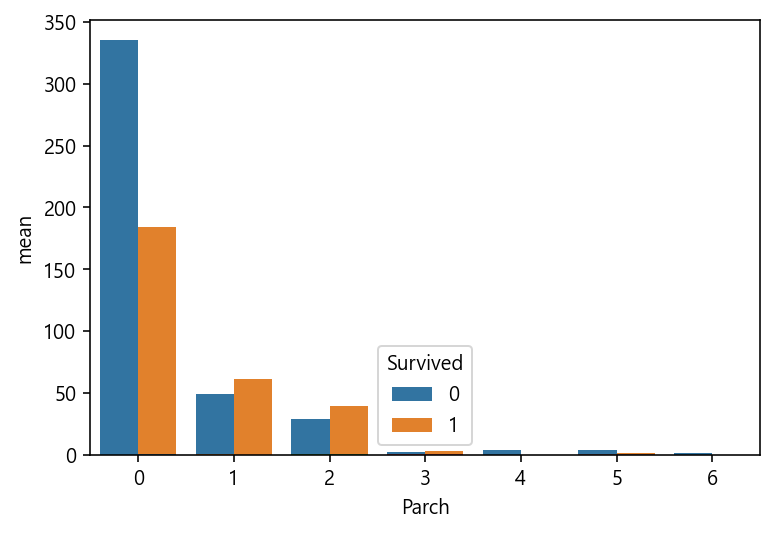

In [16]:
for i in set(train.columns)-{'Age','Survived'}:
    sns.barplot(data=train.groupby([i,'Survived'],as_index=False).agg(count=('Survived','count')),x=i,y='count',hue='Survived')
    sns.barplot(data=train.groupby([i],as_index=False).agg(mean=('Survived','mean')),x=i,y='mean')
    plt.show()

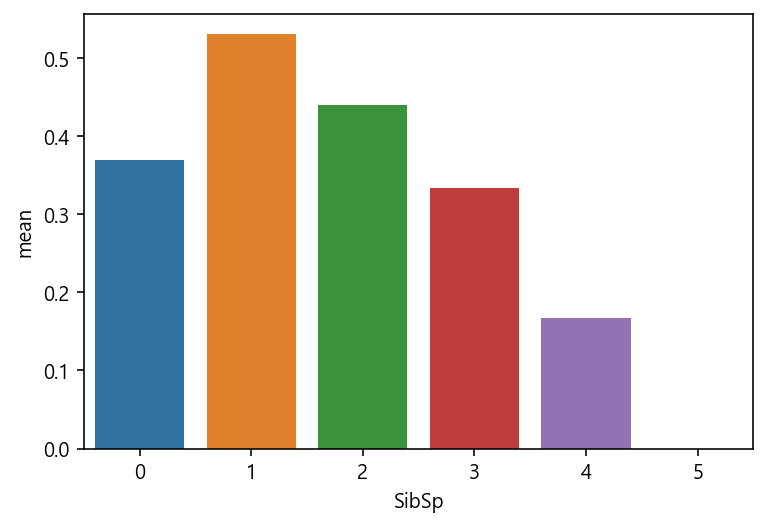

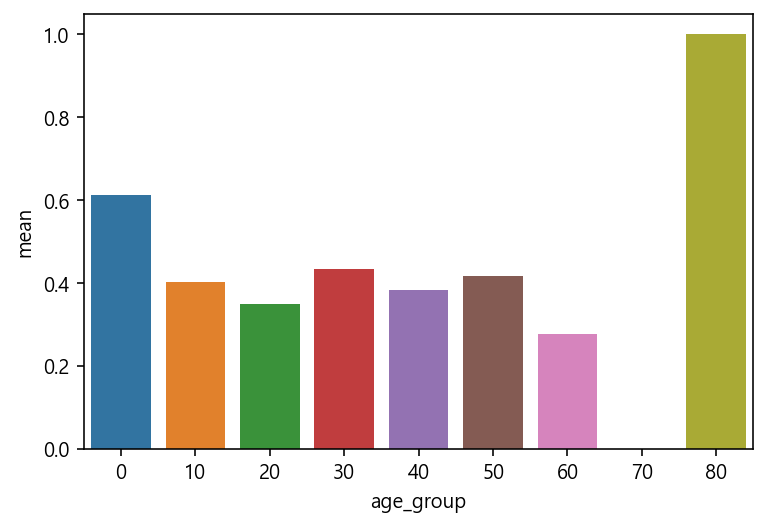

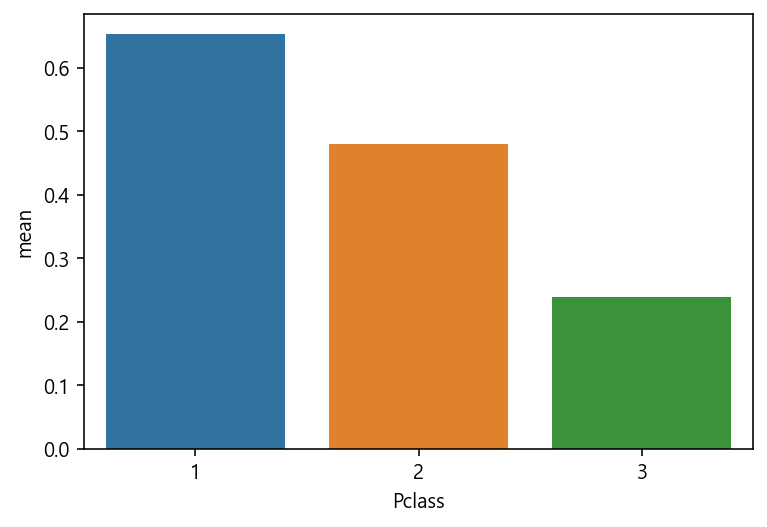

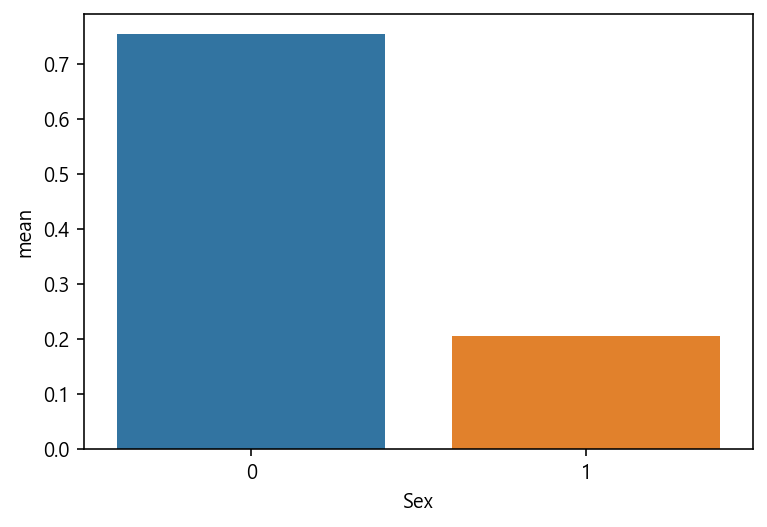

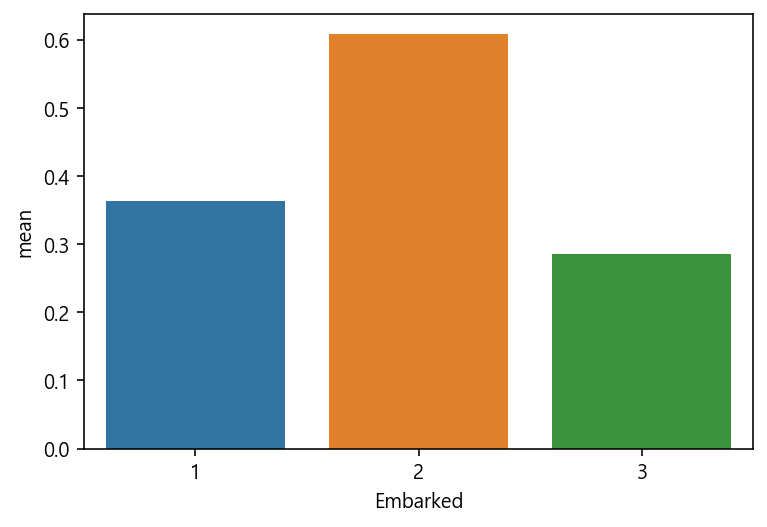

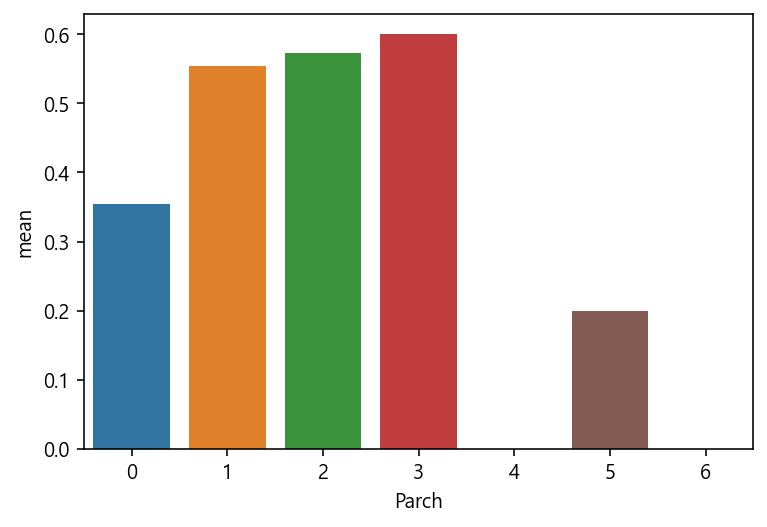

In [17]:
for j in set(train.columns)-{'Age','Survived'}:    
    sns.barplot(data=train.groupby(j,as_index=False).agg(mean=('Survived','mean')),x=j,y='mean')
    plt.show()

# ML

In [18]:
list(train.columns)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked', 'age_group']

In [19]:
X_train = train[['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'age_group']]
Y_train = train['Survived'] 
X_test = test[['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'age_group']]
Y_test = test['Survived'] 

## DT

In [20]:
from sklearn.tree import DecisionTreeClassifier
#for i in range(1,6):
i=6
dtc = DecisionTreeClassifier(max_depth =i)
dtc.fit(X_train.values,Y_train)
pred_rf = dtc.predict(X_test)

dtc_train_score = dtc.score(X_train, Y_train)
dtc_test_score = dtc.score(X_test, Y_test)
print(f'max_depth = {i},  dtc_train_score : {round(dtc_train_score,3)}, dtc_test_score : {round(dtc_test_score,3)}, delta : {round(dtc_train_score-dtc_test_score,3)}')

max_depth = 6,  dtc_train_score : 0.848, dtc_test_score : 0.883, delta : -0.034


In [46]:
deadoralive = dtc.predict([[1,0,0,0,2,30]])
print('alive' if deadoralive==1 else 'dead')

alive


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, pred_rf)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred_rf)
print(class_report)

[[195  10]
 [ 29  98]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       205
           1       0.91      0.77      0.83       127

    accuracy                           0.88       332
   macro avg       0.89      0.86      0.87       332
weighted avg       0.88      0.88      0.88       332



C:\Users\BECK\AppData\Local\Temp\ipykernel_15976\4259529644.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


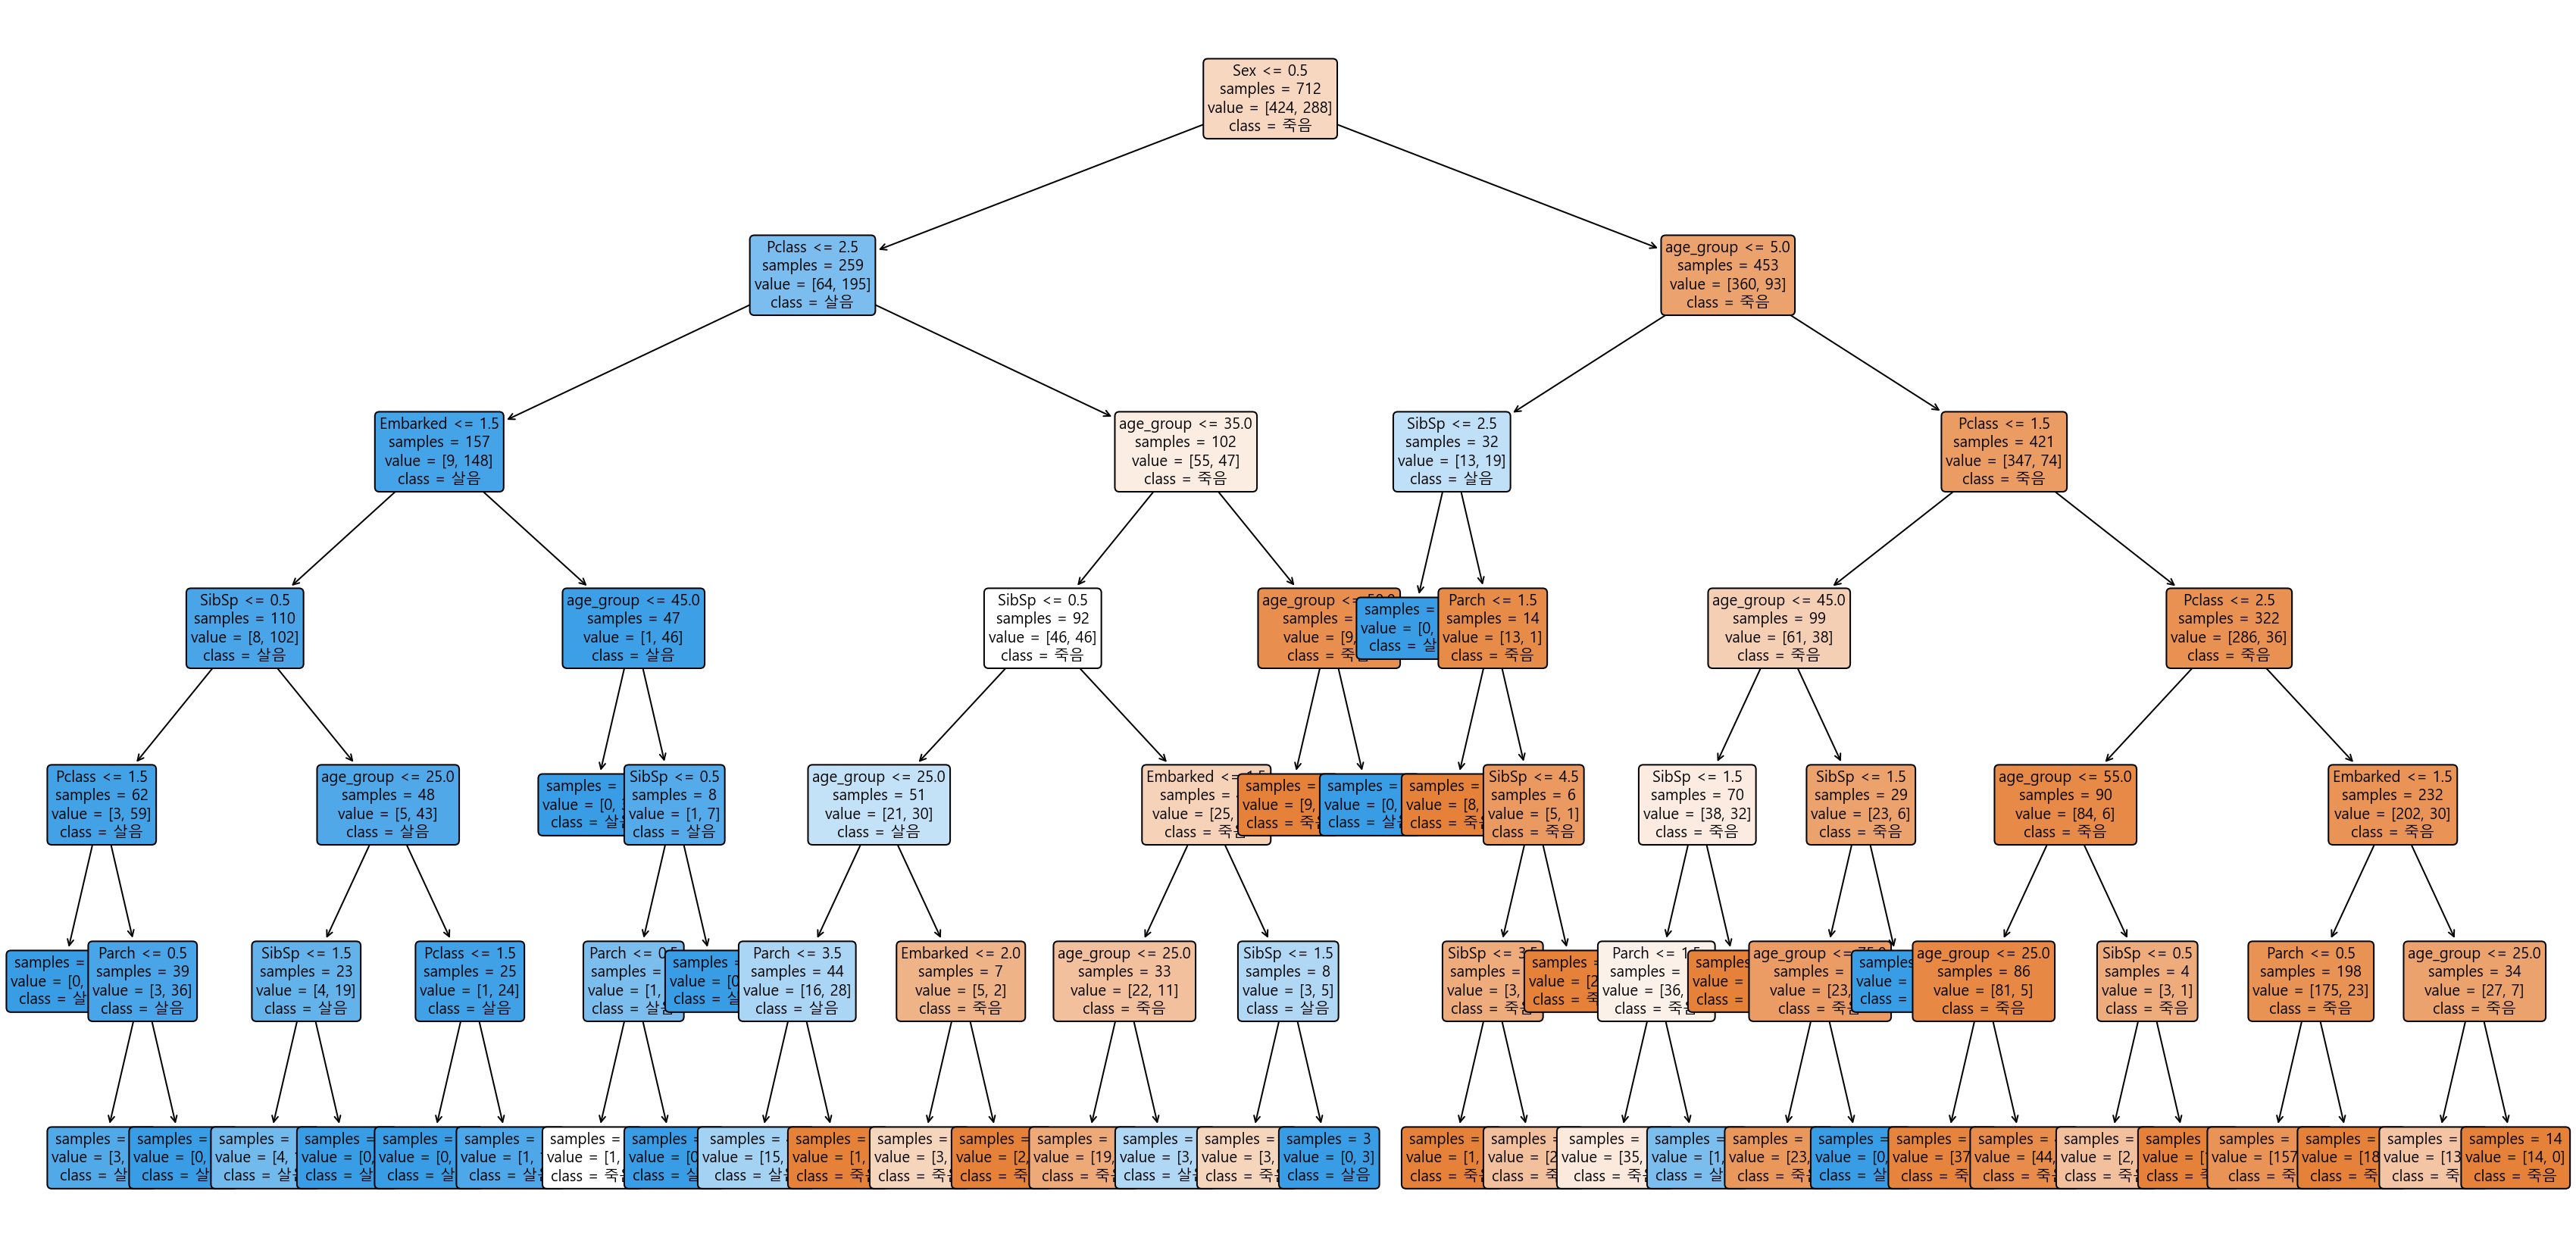

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [30,15]

plot_tree(dtc, class_names=["죽음", "살음"],
          feature_names=dtc.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=10)

plt.show()

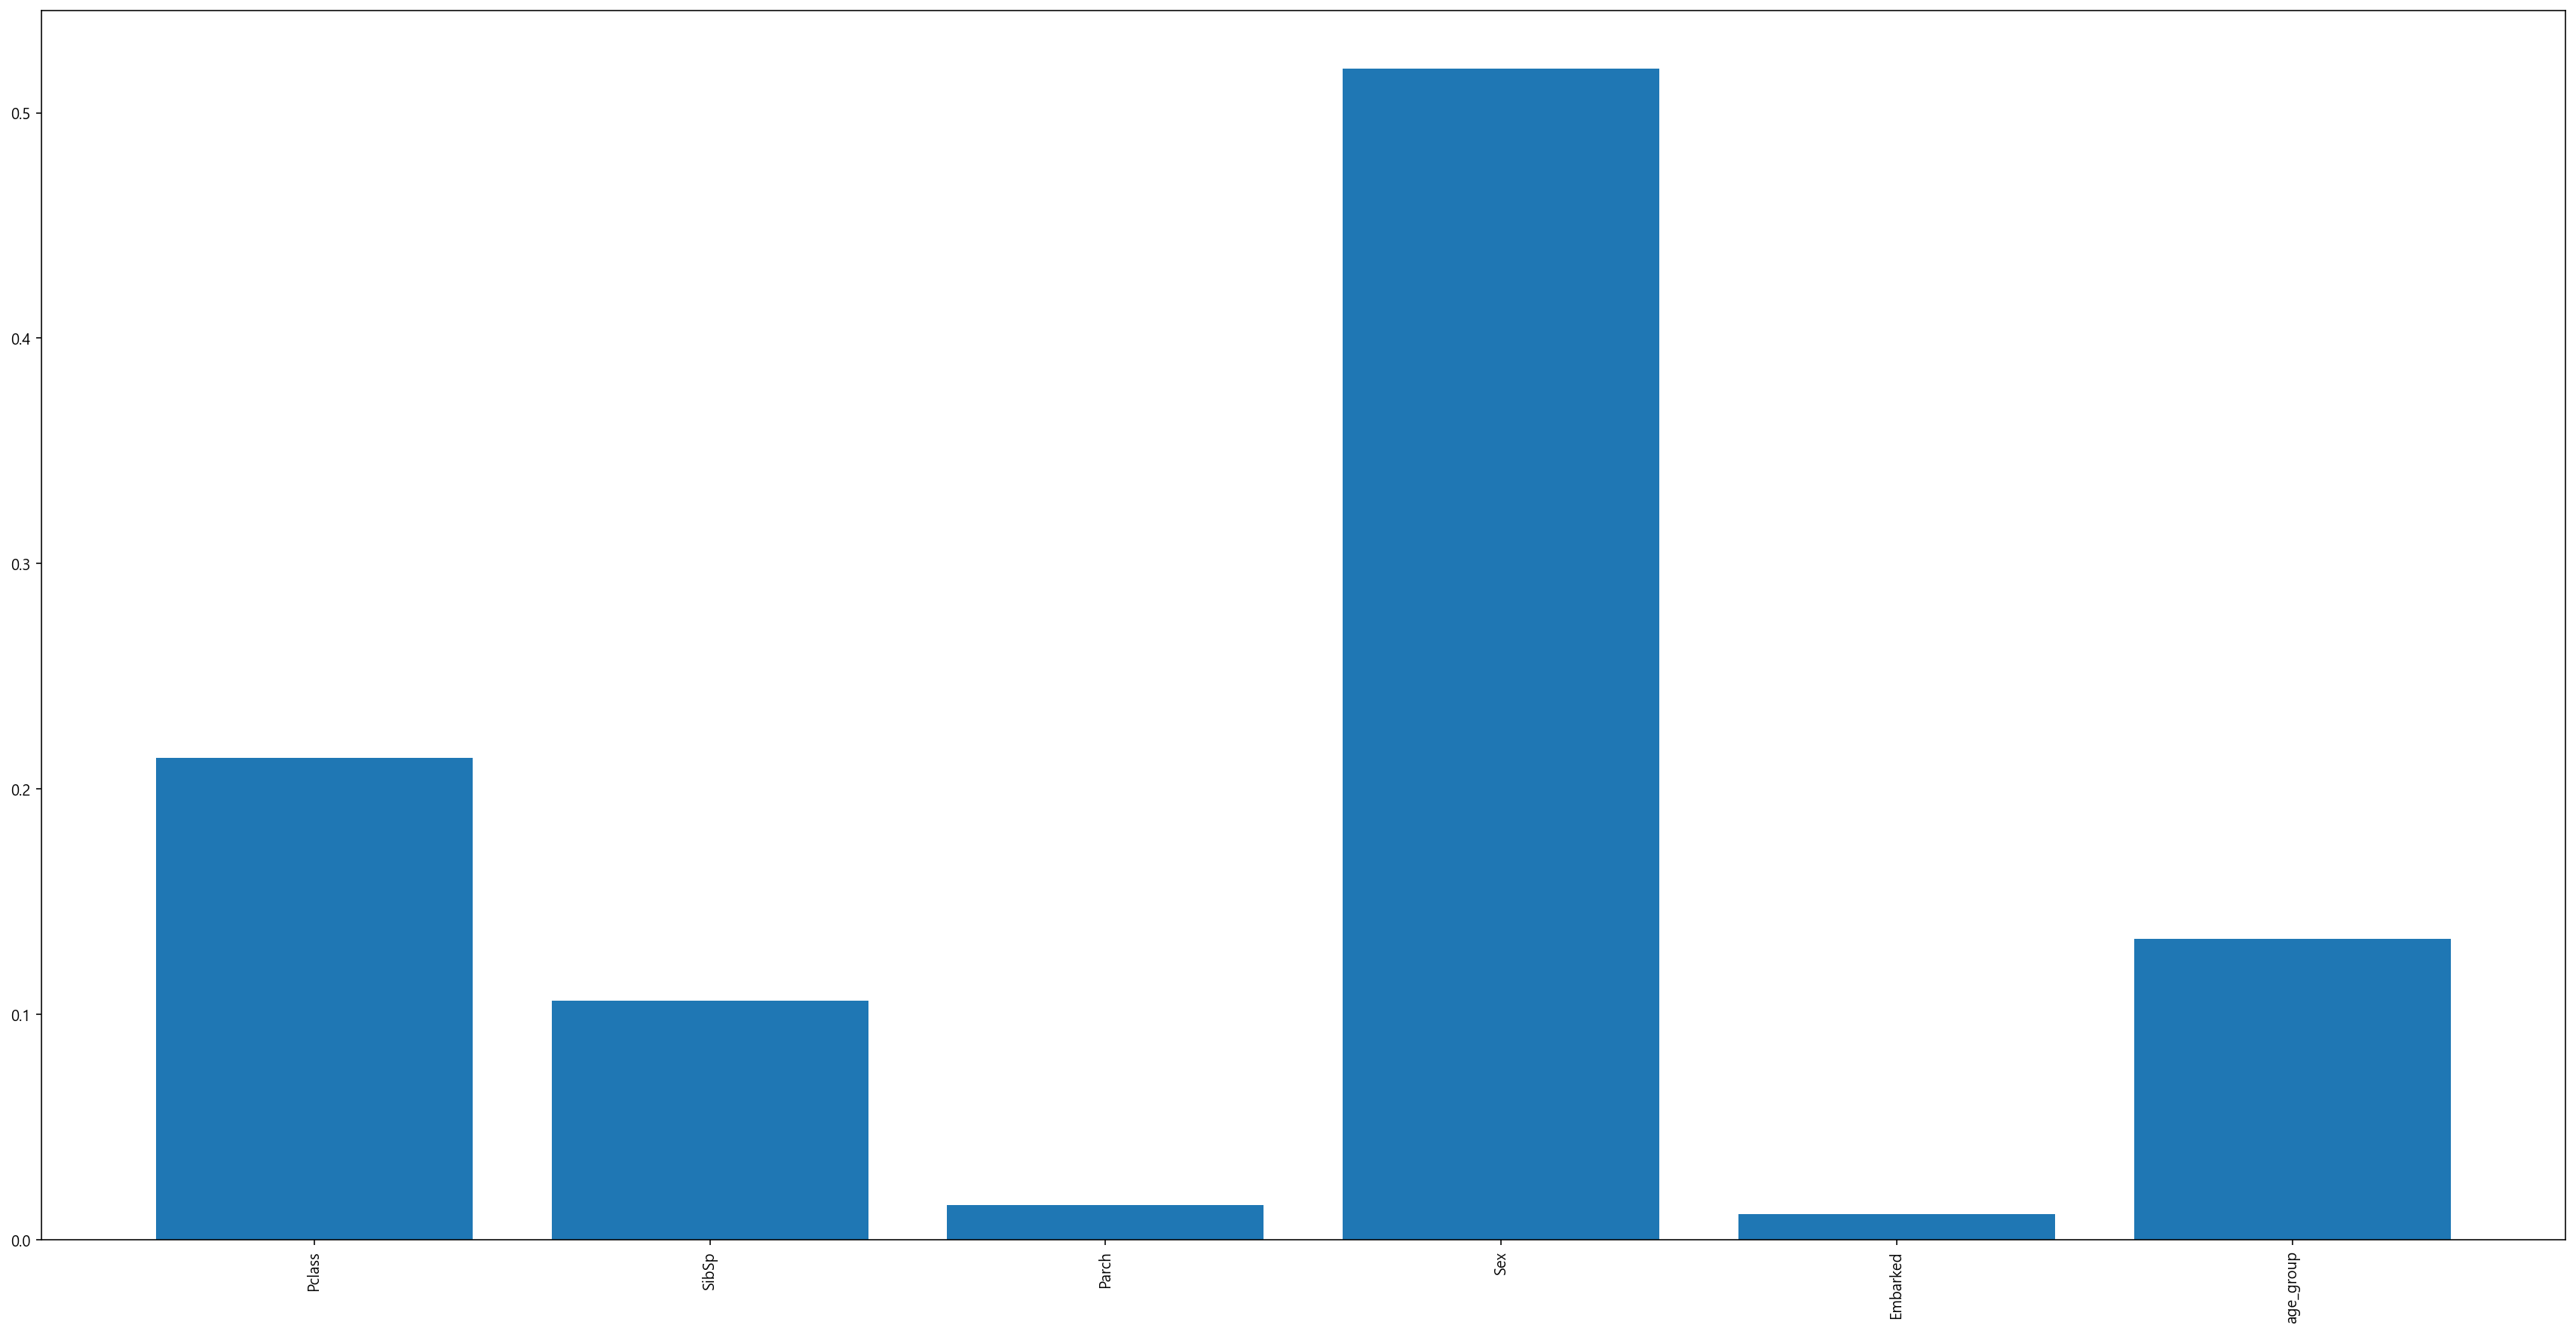

In [23]:
importance = dtc.feature_importances_
importance
plt.figure()
plt.bar(range(len(importance)),importance)
plt.xticks(range(len(importance)),X_train.columns,rotation=90)
plt.show()

## RF

In [24]:
from sklearn.ensemble import RandomForestClassifier
""" for i in range(1,6):
    for j in range(1,10): """
i=3
j=2
rf = RandomForestClassifier(max_depth =i, n_estimators =50*j)
rf.fit(X_train, Y_train.ravel())
pred_rf = rf.predict(X_test)

rf_train_score = rf.score(X_train, Y_train.ravel())
rf_test_score = rf.score(X_test, Y_test.ravel())
print(f'max_depth = {i}, n_estimators : {25*j}, rf_train_score : {round(rf_train_score,3)}, rf_test_score : {round(rf_test_score,3)}, delta : {round(rf_train_score-rf_test_score,3)}')

max_depth = 3, n_estimators : 50, rf_train_score : 0.823, rf_test_score : 0.925, delta : -0.102


In [25]:
conf_matrix = confusion_matrix(Y_test, pred_rf)
print(conf_matrix)

class_report = classification_report(Y_test, pred_rf)
print(class_report)

[[202   3]
 [ 22 105]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       205
           1       0.97      0.83      0.89       127

    accuracy                           0.92       332
   macro avg       0.94      0.91      0.92       332
weighted avg       0.93      0.92      0.92       332



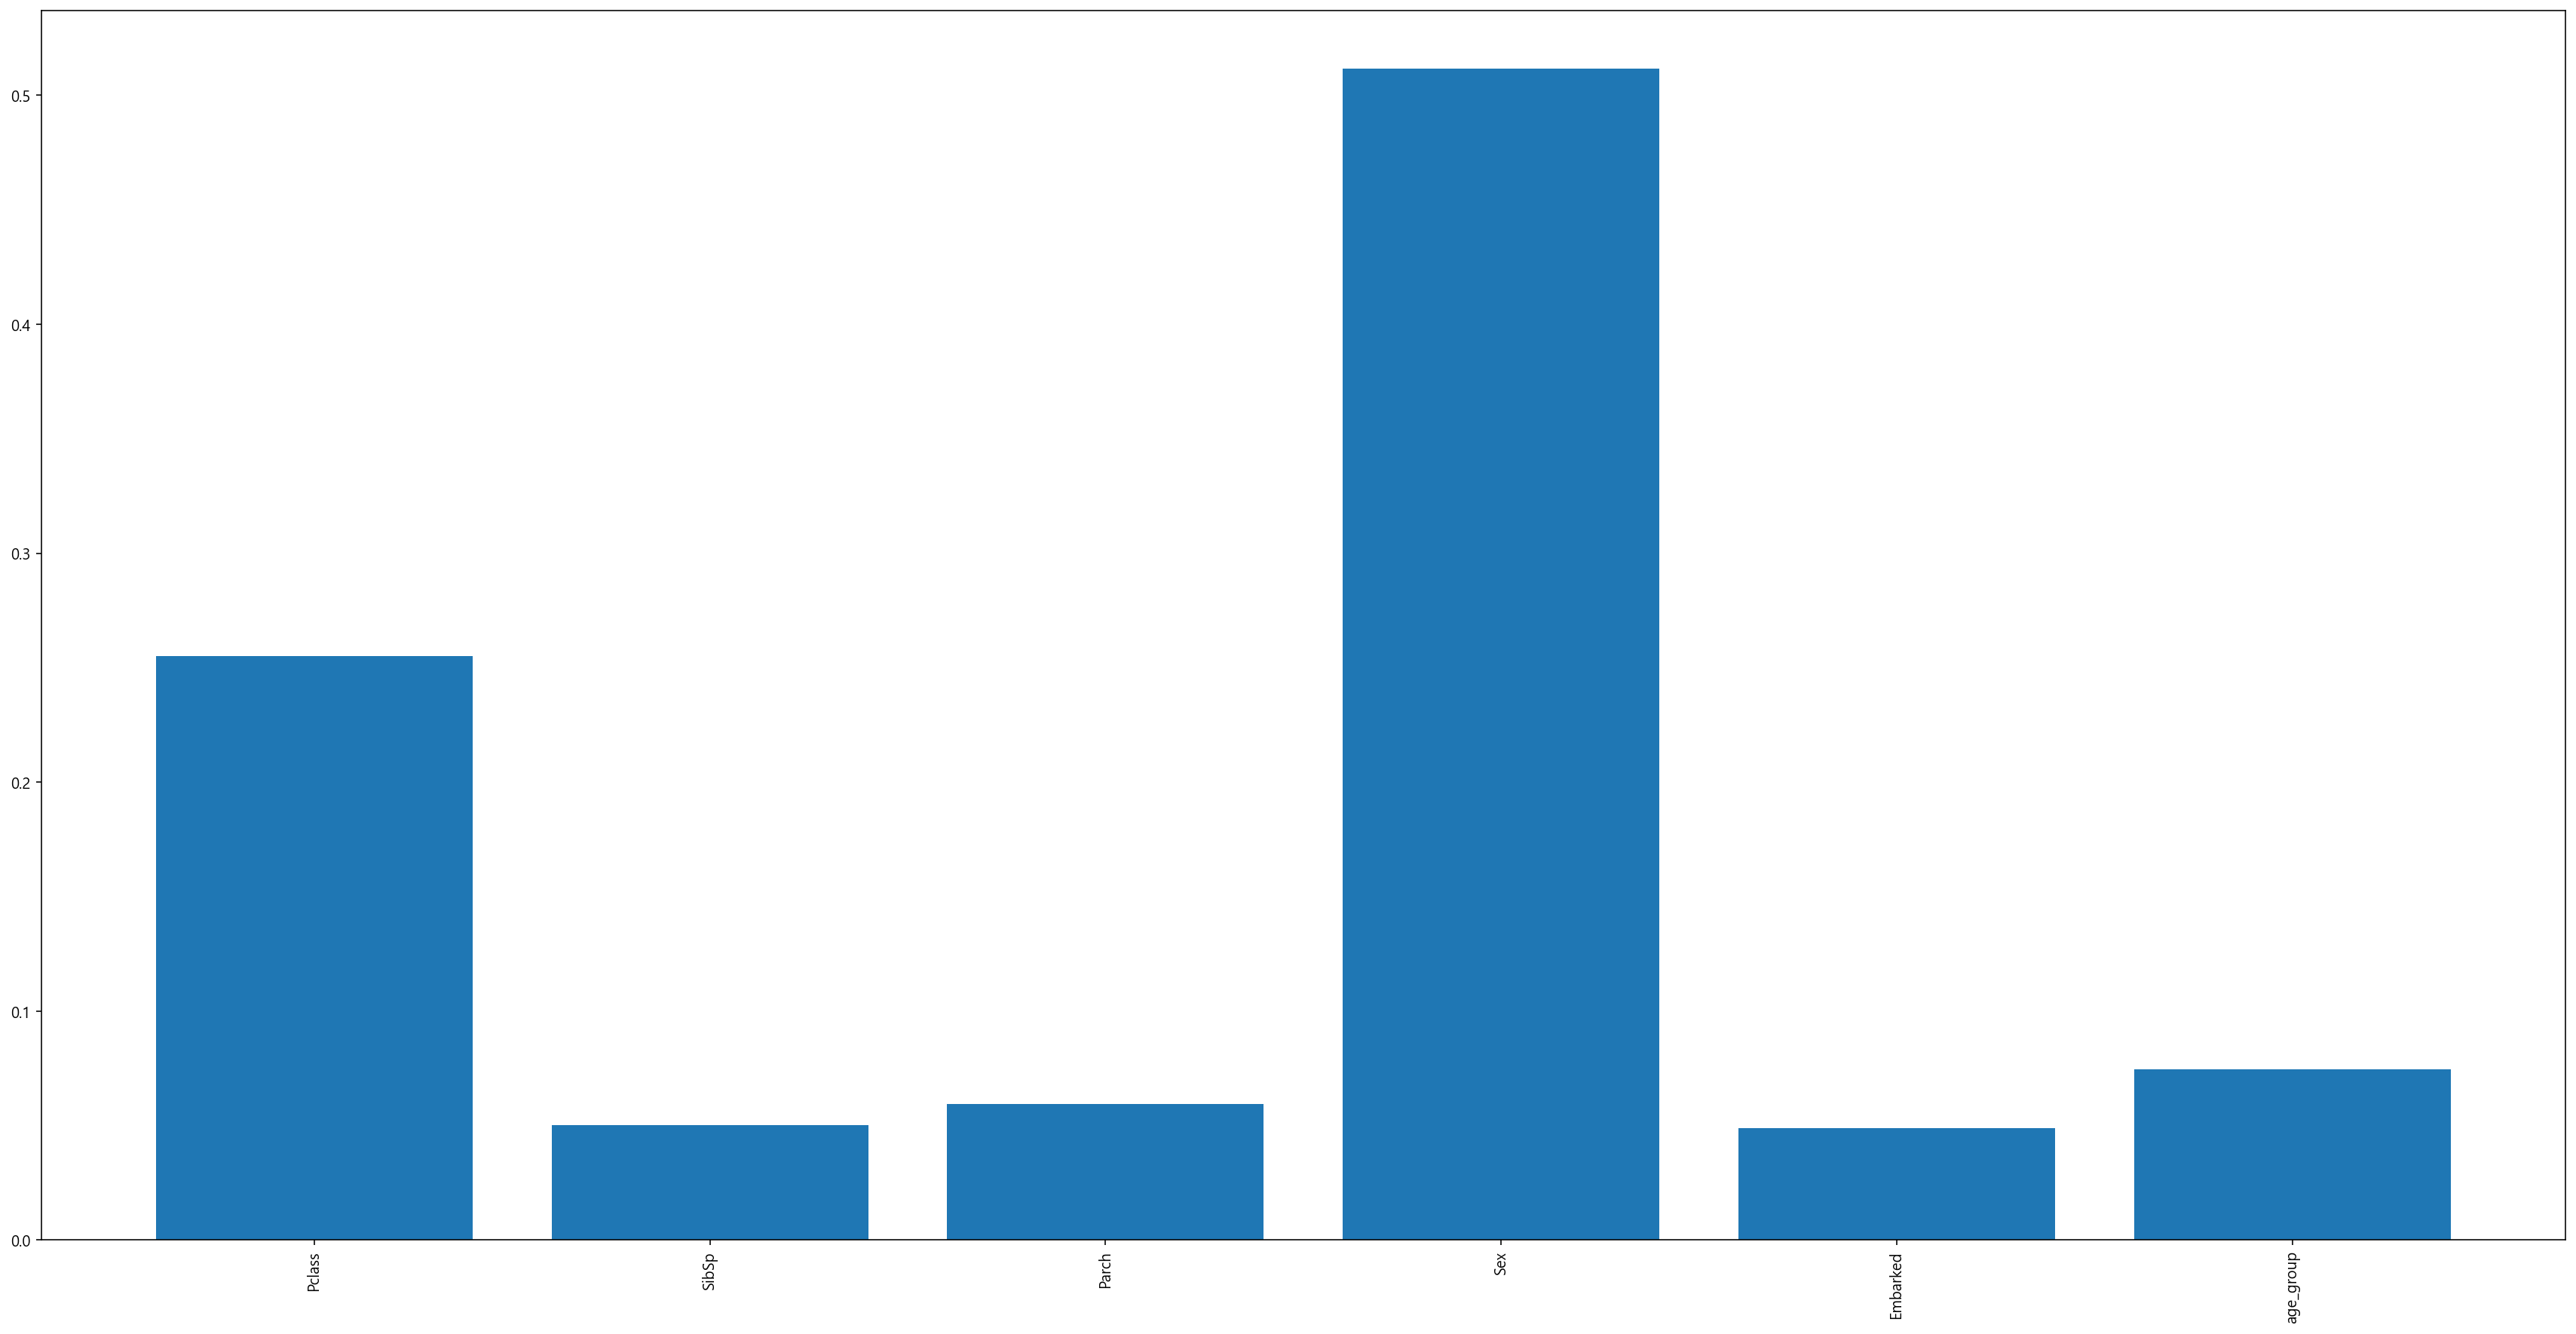

In [26]:
importance = rf.feature_importances_
importance
plt.figure()
plt.bar(range(len(importance)),importance)
plt.xticks(range(len(importance)),X_train.columns,rotation=90)
plt.show()

## GB

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

""" for i in range(1,5):
    for j in range(1,11): """
i = 4  #4
j = 4  #4
gbrt = GradientBoostingClassifier(max_depth = i, learning_rate = 0.01*j)
gbrt.fit(X_train,Y_train)
pred_rf = gbrt.predict(X_test)

gbrt_train_score = gbrt.score(X_train, Y_train)
gbrt_test_score = gbrt.score(X_test, Y_test)
print(f'max_depth = {i}, learning_rate={0.01*j}, gbrt_train_score : {round(gbrt_train_score,3)}, gbrt_test_score : {round(gbrt_test_score,3)}, delta : {round(gbrt_train_score-gbrt_test_score,3)}')

max_depth = 4, learning_rate=0.04, gbrt_train_score : 0.847, gbrt_test_score : 0.886, delta : -0.039


In [28]:
conf_matrix = confusion_matrix(Y_test, pred_rf)
print(conf_matrix)

class_report = classification_report(Y_test, pred_rf)
print(class_report)

[[185  20]
 [ 18 109]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       205
           1       0.84      0.86      0.85       127

    accuracy                           0.89       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.89      0.89      0.89       332



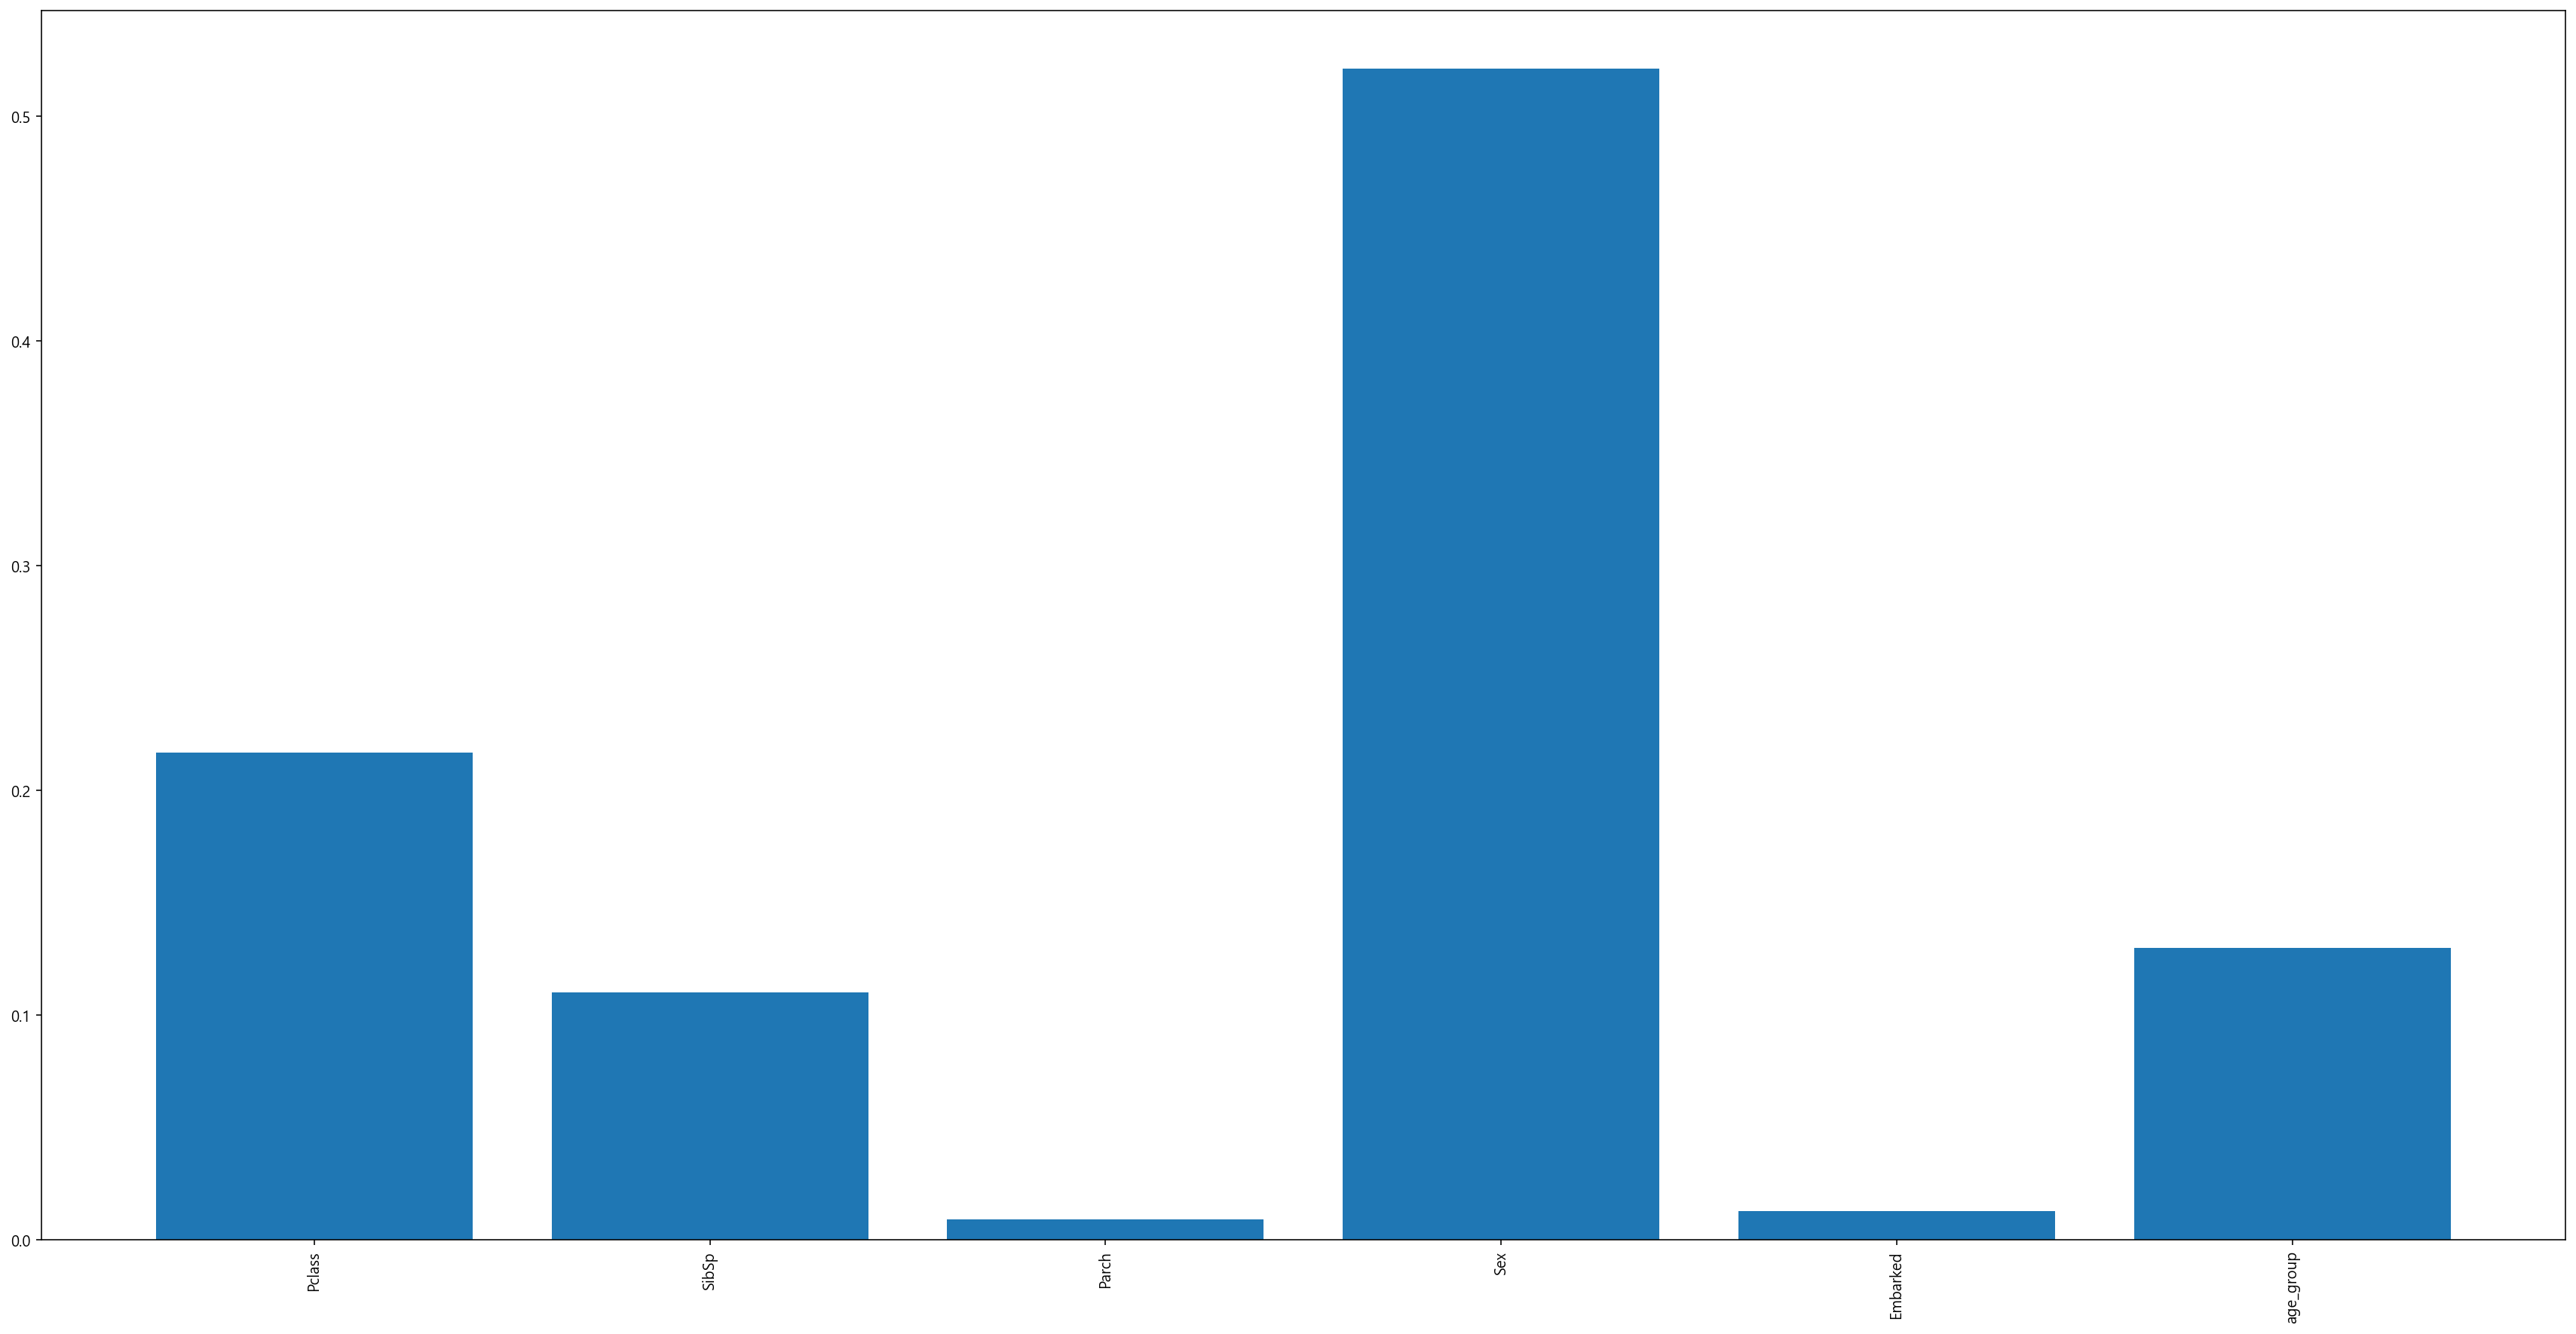

In [29]:
importance = gbrt.feature_importances_
importance
plt.figure()
plt.bar(range(len(importance)),importance)
plt.xticks(range(len(importance)),X_train.columns,rotation=90)
plt.show()